<a href="https://colab.research.google.com/github/Rijinputhiyonnan/ICT-daily-task-Rijin/blob/main/daily_task_01_08_24_K_means%2C_Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/fish.csv',header=None)

In [4]:
df

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [5]:
col_names = ['Type','Weight','l1','l2','l3','height','width']

In [7]:
df.columns = col_names
df.head()

,Type,Weight,l1,l2,l3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    85 non-null     object 
 1   Weight  85 non-null     float64
 2   l1      85 non-null     float64
 3   l2      85 non-null     float64
 4   l3      85 non-null     float64
 5   height  85 non-null     float64
 6   width   85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [9]:
df.describe()


,Weight,l1,l2,l3,height,width
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [10]:
df['Type'].unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

In [11]:
x=df[['Weight','l1']]

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_               #will calculate with in cluster sum of sqaures
  wcss.append(css)

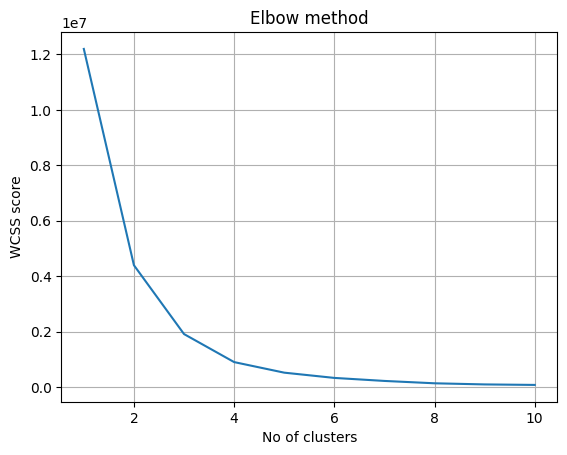

In [13]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.title('Elbow method')
plt.grid()
plt.show()

In [14]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [15]:
cluster_labels=km.predict(x)

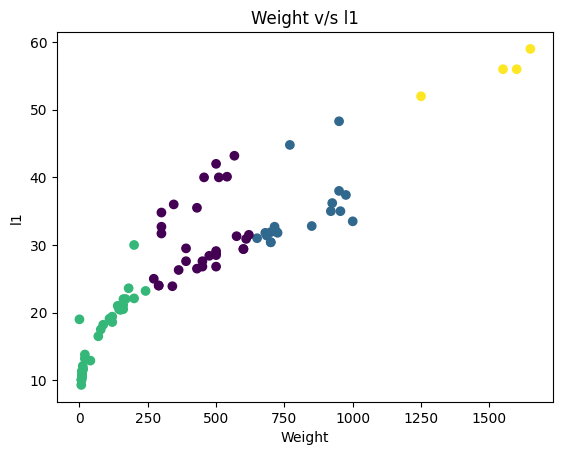

In [16]:
plt.scatter(x['Weight'],x['l1'],c=cluster_labels)
plt.xlabel('Weight')
plt.ylabel('l1')
plt.title('Weight v/s l1')
plt.show()

In [17]:
df['cluster_labels']=cluster_labels

In [18]:
df.head()

,Type,Weight,l1,l2,l3,height,width,cluster_labels
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,2
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,0
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,0
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0


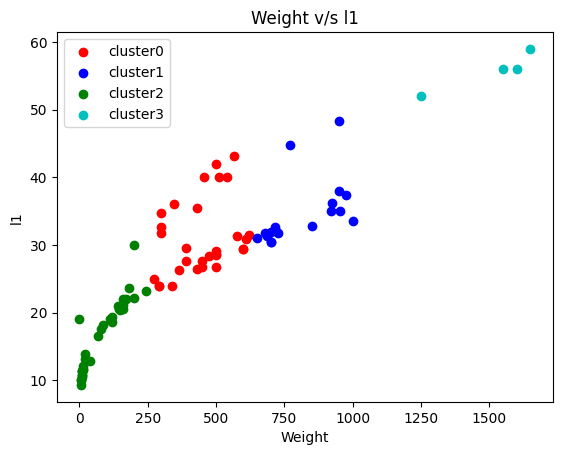

In [19]:
colors=['r','b','g','c']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Weight'],cluster_data['l1'],c=colors[i],label=f'cluster{i}')
plt.xlabel('Weight')
plt.ylabel('l1')
plt.title('Weight v/s l1')
plt.legend()
plt.show()

In [20]:
def predict_cluster(weight,l1):
  new_data=[[weight,l1]]
  cluster=km.predict(new_data)
  return cluster[0]

In [21]:
weight=20
l1=45
c=predict_cluster(weight,l1)
print(f'Fish belongs to :{c}')

Fish belongs to :2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [23]:
#  Agglomerative Hierarchial Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [24]:
mergings=linkage(x,method='ward')

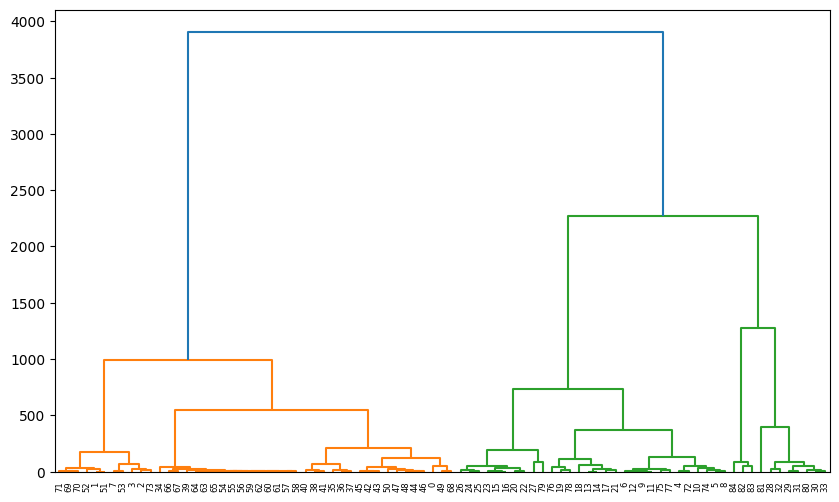

In [25]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [26]:
cluster_label=fcluster(mergings,2500,criterion='distance')

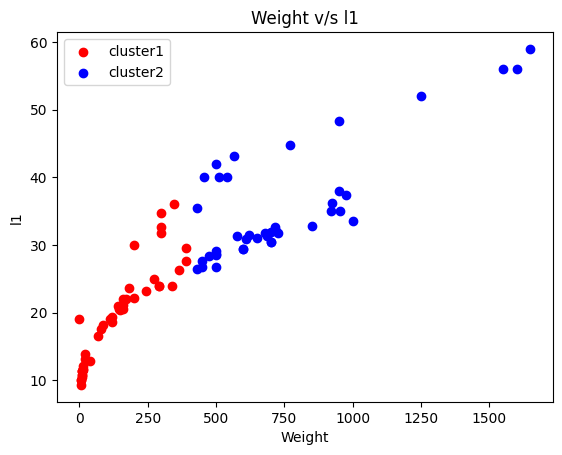

In [27]:
colors=['r','b']
for i in range(1,max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['Weight'],cluster_data['l1'],c=colors[i-1],label=f'cluster{i}')
plt.xlabel('Weight')
plt.ylabel('l1')
plt.title('Weight v/s l1')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_label)
print(sil_avg)

0.5838805870259255
